# Acceleration and PPG Signals

This notebook shows acceleration and PPG signals recorded from the wrist during a protocol with various activities. The different activities are listed here.

* Lying down
* Standing
* Sitting
* Walking
* Running

First, we import the required packages and define global constants.

In [1]:
%matplotlib widget


import pathlib

import matplotlib.pyplot as plt
import numpy as np
import scipy.signal


DATA_FILE = pathlib.Path("../data/activity_data.npz")

Then, we load the acceleration and PPG signals as well as the reference heart rate.

In [2]:
def load_data():
    with np.load(DATA_FILE) as data:
        time = data["time"]
        acceleration = data["acceleration"]
        ppg = data["ppg"]
        hr_time = data["hr_time"]
        hr = data["hr"]
    return time, acceleration, ppg, hr_time, hr


time, acceleration, ppg, hr_time, hr = load_data()

Finally, we plot the signals and the heart rate.

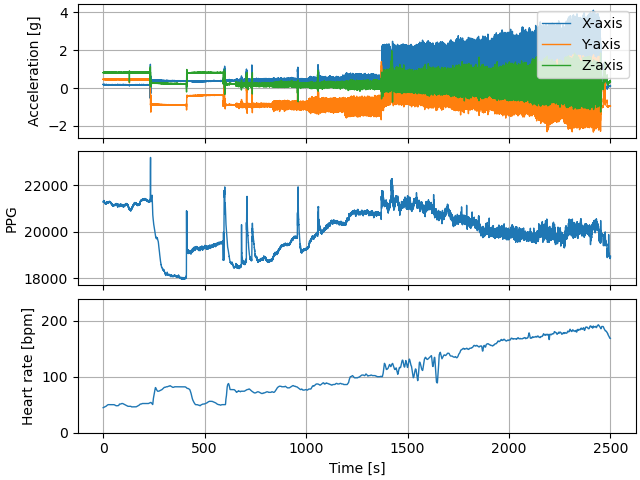

In [3]:
def plot_signals(
    time, acceleration, ppg, hr_time, hr, start=None, end=None, title=None
):
    mask = np.ones(time.size, dtype="bool")
    hr_mask = np.ones(hr_time.size, dtype="bool")
    if start is not None:
        mask = np.logical_and(mask, time >= start)
        hr_mask = np.logical_and(hr_mask, hr_time >= start)
    if end is not None:
        mask = np.logical_and(mask, time <= end)
        hr_mask = np.logical_and(hr_mask, hr_time <= end)
    time = time[mask]
    acceleration = acceleration[mask]
    ppg = ppg[mask]
    hr_time = hr_time[hr_mask]
    hr = hr[hr_mask]

    fig, axes = plt.subplots(3, 1, sharex="all", constrained_layout=True)
    if title is not None:
        plt.suptitle(title)
    plt.sca(axes.flat[0])
    plt.plot(time, acceleration, linewidth=1)
    plt.grid()
    plt.ylabel("Acceleration [g]")
    plt.legend(["X-axis", "Y-axis", "Z-axis"], loc="upper right")
    plt.sca(axes.flat[1])
    plt.plot(time, ppg, linewidth=1)
    plt.grid()
    plt.ylabel("PPG")
    plt.sca(axes.flat[2])
    plt.plot(hr_time, hr, linewidth=1)
    plt.ylim(0.0, 240.0)
    plt.grid()
    plt.xlabel("Time [s]")
    plt.ylabel("Heart rate [bpm]")


plot_signals(time, acceleration, ppg, hr_time, hr)

We can also plot the spectrogram of the PPG signal to see the different frequency components.

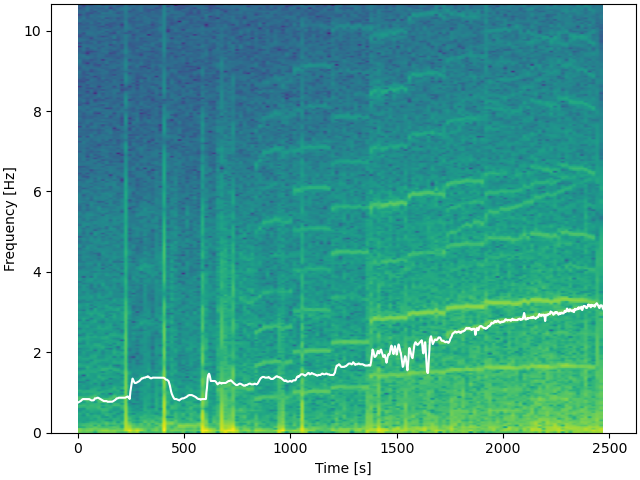

In [4]:
def plot_spectrogam(time, ppg, hr_time, hr):
    fs = 1.0 / np.median(np.diff(time))
    plt.figure(constrained_layout=True)
    plt.specgram(ppg, Fs=fs, NFFT=512, detrend="mean")
    plt.plot(hr_time, hr / 60.0, color="white")
    plt.xlabel("Time [s]")
    plt.ylabel("Frequency [Hz]")


plot_spectrogam(time, ppg, hr_time, hr)

Here are a few excerpts of the PPG signal when the subject is lying down, standing, walking, and running. The power spectral density of the PPG signal is also shown for each excerpt.

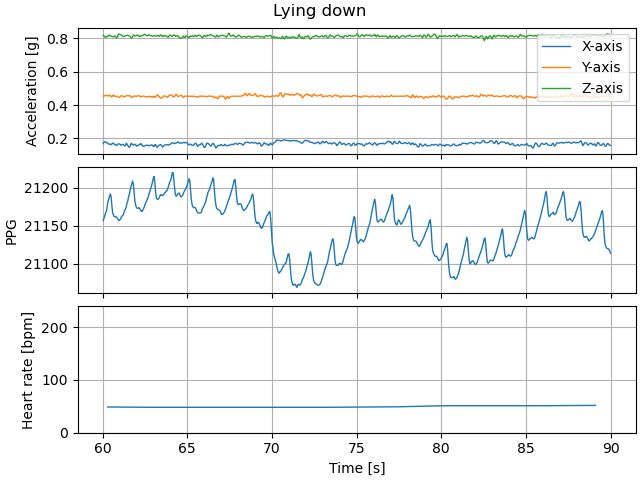

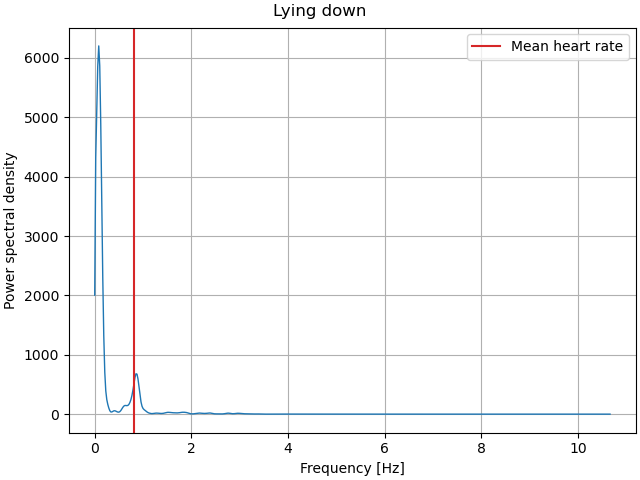

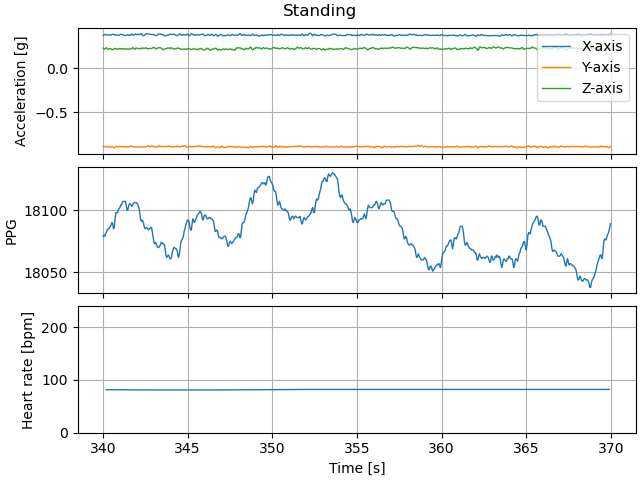

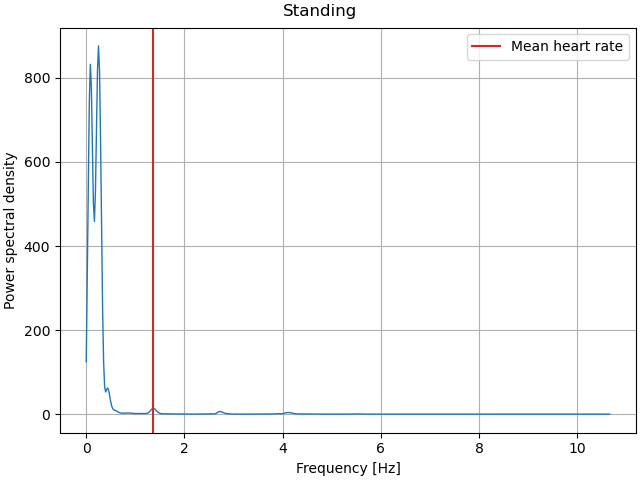

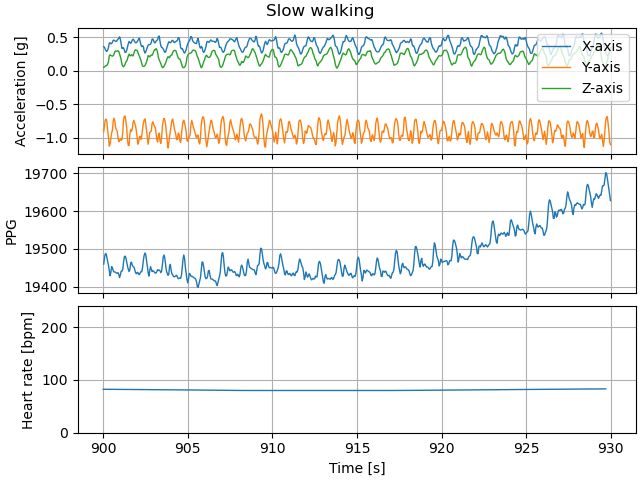

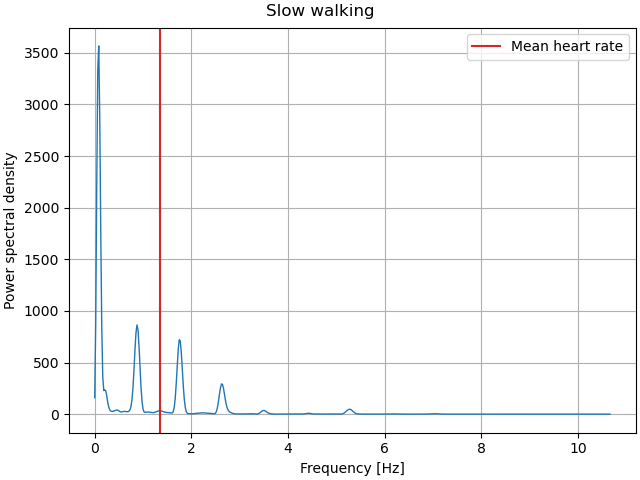

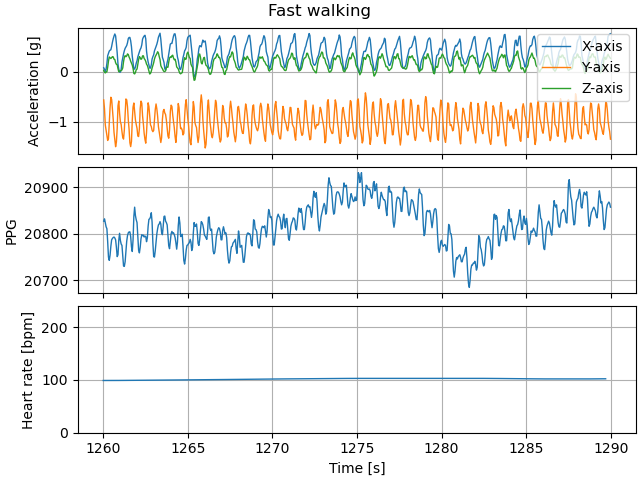

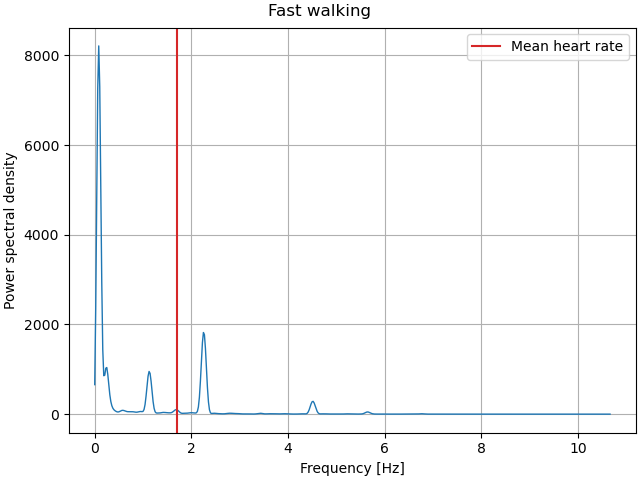

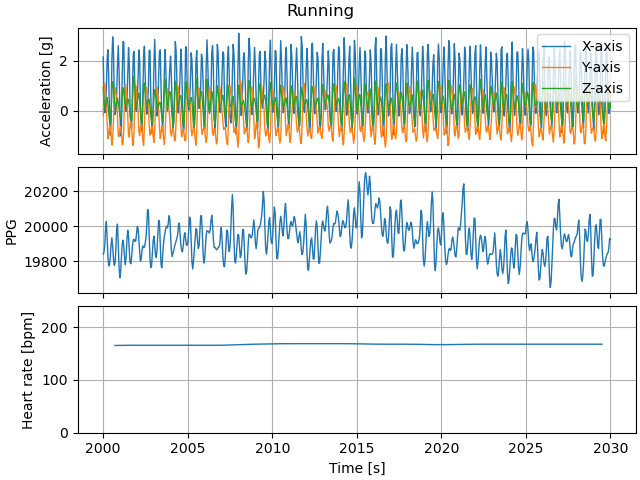

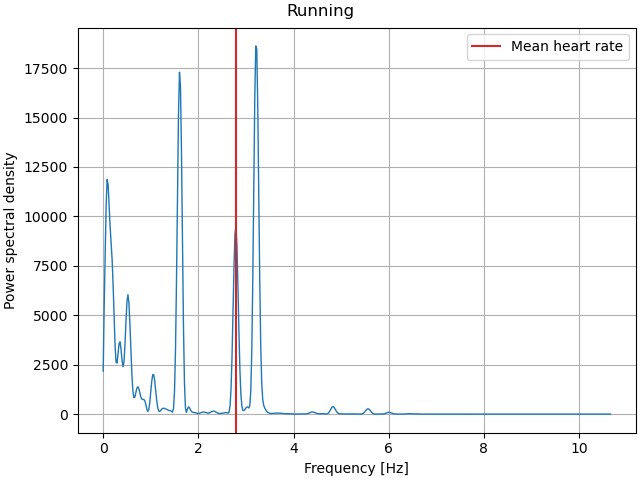

In [5]:
def plot_power_spectral_density(
    time, ppg, hr_time, hr, start=None, end=None, title=None
):
    fs = 1.0 / np.median(np.diff(time))
    mask = np.ones(time.size, dtype="bool")
    hr_mask = np.ones(hr_time.size, dtype="bool")
    if start is not None:
        mask = np.logical_and(mask, time >= start)
        hr_mask = np.logical_and(hr_mask, hr_time >= start)
    if end is not None:
        mask = np.logical_and(mask, time <= end)
        hr_mask = np.logical_and(hr_mask, hr_time <= end)
    f, s = scipy.signal.welch(ppg[mask], fs=fs, nperseg=256, nfft=1024)
    mean_hr = np.mean(hr[hr_mask])

    plt.figure(constrained_layout=True)
    if title is not None:
        plt.suptitle(title)
    plt.plot(f, s, linewidth=1)
    plt.axvline(mean_hr / 60.0, color="tab:red", label="Mean heart rate")
    plt.grid()
    plt.xlabel("Frequency [Hz]")
    plt.ylabel("Power spectral density")
    plt.legend(loc="upper right")


segments = [
    {"start": 60.0, "end": 90.0, "title": "Lying down"},
    {"start": 340.0, "end": 370.0, "title": "Standing"},
    {"start": 900.0, "end": 930.0, "title": "Slow walking"},
    {"start": 1260.0, "end": 1290.0, "title": "Fast walking"},
    {"start": 2000.0, "end": 2030.0, "title": "Running"},
]
for segment in segments:
    plot_signals(
        time,
        acceleration,
        ppg,
        hr_time,
        hr,
        start=segment["start"],
        end=segment["end"],
        title=segment["title"],
    )
    plot_power_spectral_density(
        time,
        ppg,
        hr_time,
        hr,
        start=segment["start"],
        end=segment["end"],
        title=segment["title"],
    )

## Question 1

What are the main differences in terms of acceleration and PPG signals between the different activites? When is the cardiac activity the most visible? Can you always see the cardiac activity?